In [42]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from colorspacious import cspace_converter
plt.style.use('ggplot')
import datetime

## Définition des différentes métriques que nous allons tester :


Précision: c'est le nombre de vrais positifs divisé par le nombre total de positifs prédits. Elle mesure la proportion de résultats positifs corrects parmi tous les résultats positifs prédits.


Rappel: c'est le nombre de vrais positifs divisé par le nombre total de vrais positifs. Elle mesure la proportion de résultats positifs corrects parmi tous les éléments qui sont réellement positifs.


F1-score: c'est une métrique qui combine la précision et le rappel en un seul score. Elle est calculée en utilisant la formule suivante: F1-score = 2 * (précision * rappel) / (précision + rappel)


AUC (Area Under the Curve): c'est une métrique couramment utilisée pour évaluer les modèles de classification binaires. Elle mesure l'aire sous la courbe ROC (Receiver Operating Characteristic). La courbe ROC est un graphique qui montre comment le taux de vrais positifs (sensibilité) change avec le taux de faux positifs (spécificité) en fonction de différents seuils de classification.

## Test accuracy


In [43]:
dataset = pd.read_csv('/Users/paulinetournier/Desktop/main4/codeprojet2/main4_capgemini/pre-traitement/données/stockage_csv/64_adresse_vouloir_n.csv')
#le path est à changer en fonction de l'endroit où on a mis le fichier csv
#ici, il prend un csv pré-enregistré avec 2 mots différents


 Attention : paramètres à changer en fonction du csv

In [44]:
nb_mots = 64 #nombre de classe de mots différents dans le csv

In [45]:
dataset =dataset.fillna(0) #remplace les valeurs manquantes par 0

 

y = dataset[['class']] # vecteur colonne contenant la classe (= le nom du mot)
X = dataset.iloc[:, 1:6001] # matrice contenant toutes les coordonnées d'une vidéo 

#on split les données en données d'entrainements : X_train, y_train et en données de test : X_test et y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27, stratify= y) #on séépare les données en 2 parties : 25% pour le test et 75% pour l'entrainement
#strategy = y permet de garder la même proportion de chaque classe dans les données d'entrainement et de test



In [46]:
## On va tester plusieurs modèles de classification
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=nb_mots, leaf_size=1)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('SGDC',SGDClassifier(loss="hinge", penalty="l2", max_iter=5)))
models.append(('MPL',MLPClassifier(solver='lbfgs', alpha = 1e-5, hidden_layer_sizes=(15,), random_state=1)))

--------------------------------- LR ---------------------------------------------------


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Matrice de confusion pour LR


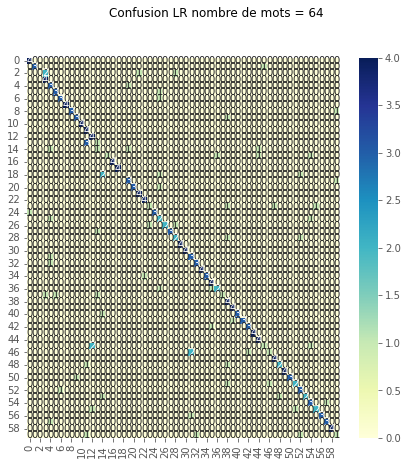

--------------------------------- LDA ---------------------------------------------------


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matrice de confusion pour LDA


<Figure size 432x288 with 0 Axes>

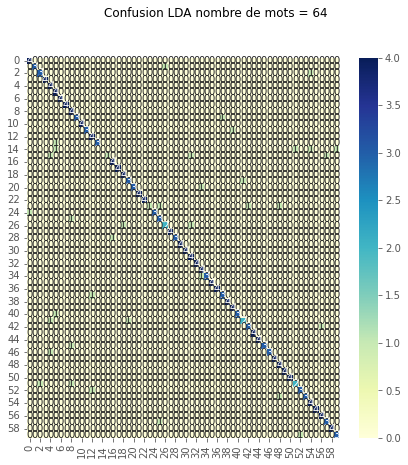

--------------------------------- KNN ---------------------------------------------------


/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Matrice de confusion pour KNN


<Figure size 432x288 with 0 Axes>

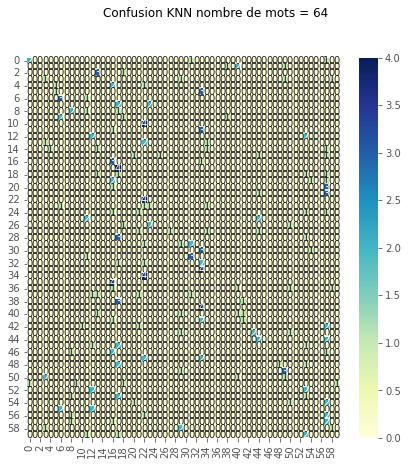

--------------------------------- CART ---------------------------------------------------
Matrice de confusion pour CART


<Figure size 432x288 with 0 Axes>

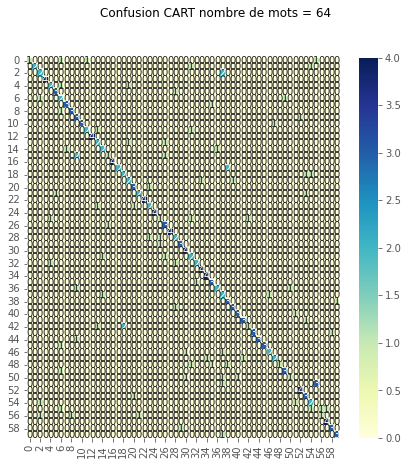

--------------------------------- NB ---------------------------------------------------


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matrice de confusion pour NB


<Figure size 432x288 with 0 Axes>

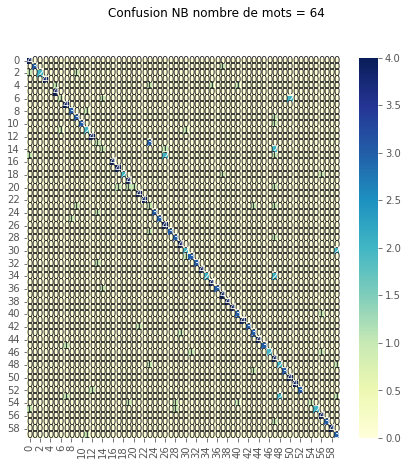

--------------------------------- SVM ---------------------------------------------------


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matrice de confusion pour SVM


<Figure size 432x288 with 0 Axes>

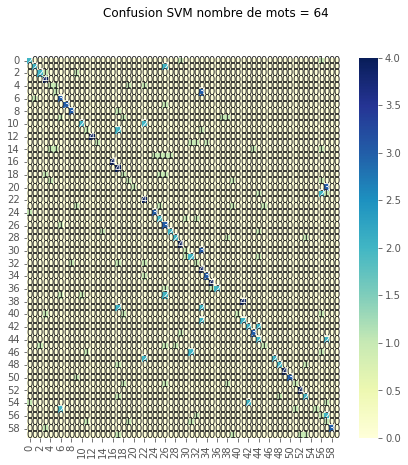

--------------------------------- SGDC ---------------------------------------------------


/usr/local/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Matrice de confusion pour SGDC


<Figure size 432x288 with 0 Axes>

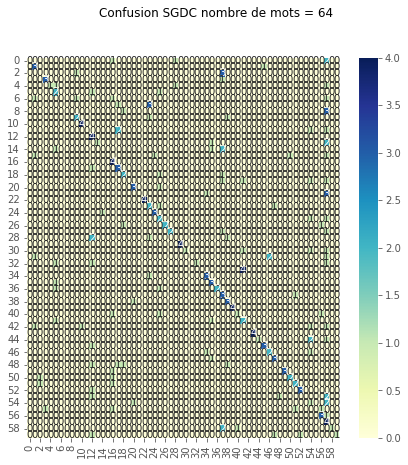

--------------------------------- MPL ---------------------------------------------------


/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:559: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Matrice de confusion pour MPL


<Figure size 432x288 with 0 Axes>

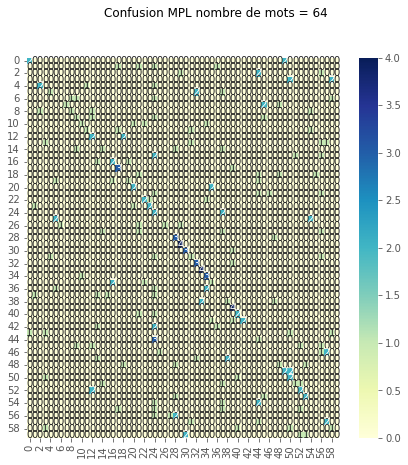

[0.7083333333333334, 0.85, 0.19166666666666668, 0.6291666666666667, 0.7291666666666666, 0.4666666666666667, 0.44583333333333336, 0.2916666666666667] ['LR', 'LDA', 'KNN', 'CART', 'NB', 'SVM', 'SGDC', 'MPL']


<Figure size 432x288 with 0 Axes>

In [47]:
results = []
names = []
scoring = 'accuracy' #on choisit de tester les modèles en fonction de leur précision 
#on pourrait tester : precision, recall, f1-score, auc, log-loss, ...

for name, model in models:
    print('---------------------------------', name, '---------------------------------------------------')
    clf = model #on prend le modèle
    clf.fit(X_train, y_train)  #on entraine le modèle
    res = sklearn.metrics.accuracy_score(y_test, clf.predict(X_test)) #on teste le modèle
    results.append(res) #on stocke le résultat
    names.append(name) #on stocke le nom du modèle
    msg = "%s: %f (%f)" % (name, res.mean(), res.std()) #on affiche le résultat

    cm = confusion_matrix(y_test, clf.predict(X_test))
    print("Matrice de confusion pour", name)
    plt.figure(figsize=(7,7))
    plt.subplot(111)
    plt.suptitle('Confusion ' +str(name)+ ' nombre de mots = '+str(nb_mots))
    sns.heatmap(cm, annot=True, cmap="YlGnBu")
    plt.show()
    plt.savefig(f'/Users/paulinetournier/Desktop/main4/codeprojet2/main4_capgemini/classificateur/resultats_plots/matrice_confusion/confusion_norma_{name}_{nb_mots}_mots.png')


    #print(msg)
print(results,names)

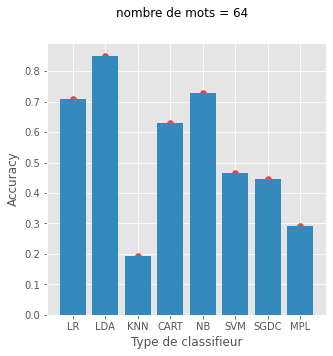

In [48]:
plt.figure(figsize=(5,5))

plt.subplot(111)
plt.bar(names, results,color='C1')
# plt.subplot(132)
plt.scatter(names, results)
plt.xlabel('Type de classifieur')
plt.ylabel('Accuracy')
# plt.plot(names, results)
plt.suptitle('nombre de mots = '+str(nb_mots))
# plt.show()


# Enregistrer l'image du plot dans un fichier
plt.savefig(f'/Users/paulinetournier/Desktop/main4/codeprojet2/main4_capgemini/classificateur/resultats_plots/accuracy/accuracy_norma_{nb_mots}_mots.png')

On enregistre le plot dans un fichier


## test for other metrics


In [49]:
# results = []
# names = []
# scoring = 'recall' #on choisit de tester les modèles en fonction de leur précision 
# #on pourrait tester : precision, recall, f1-score, auc, log-loss, ...

# for name, model in models:
#     print('---------------------------------', name, '---------------------------------------------------')
#     clf = model #on prend le modèle
#     clf.fit(X_train, y_train)  #on entraine le modèle
#     res = sklearn.metrics.recall_score(y_test, clf.predict(X_test),average='micro' ) #on teste le modèle
#     results.append(res) #on stocke le résultat
#     names.append(name) #on stocke le nom du modèle
#     msg = "%s: %f (%f)" % (name, res.mean(), res.std()) #on affiche le résultat
#     #print(msg)
# print(results,names)

Text(0.5, 0.98, 'nombre de mots = 64, métrique : accuracy')

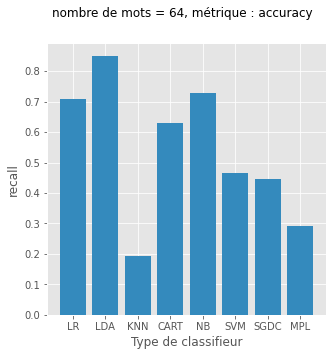

In [50]:
plt.figure(figsize=(5,5))

plt.subplot(111)
plt.bar(names, results,color='C1')
# plt.subplot(132)
# plt.scatter(names, results)
# plt.subplot(133)
# plt.plot(names, results)
plt.xlabel('Type de classifieur')
plt.ylabel('recall')
plt.suptitle('nombre de mots = '+str(nb_mots)+', métrique : '+str(scoring))
# plt.show()

# Enregistrer l'image du plot dans un fichier
#plt.savefig(f'/home/portable014/Bureau/neelp_1/MAIN_4_PC/Projet/main4_capgemini/classificateur/resultats_plots/recall_classifier__{nb_mots}_mots.png')

In [51]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Liste de différentes valeurs de leaf_size à tester
leaf_sizes = [1, 5, 10, 15, 20, 25, 30, 40, 50]

# Tableau pour stocker les précisions pour chaque valeur de leaf_size
scores = []

for leaf_size in leaf_sizes:
    knn = KNeighborsClassifier(leaf_size=leaf_size)
    score = np.mean(cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy'))
    scores.append(score)

# Recherche de la meilleure précision et de son index correspondant
best_index = np.argmax(scores)
best_leaf_size = leaf_sizes[best_index]
best_score = scores[best_index]

print("Le meilleur leaf_size est:", best_leaf_size)
print("La meilleure précision est:", best_score)



/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Le meilleur leaf_size est: 1
La meilleure précision est: 0.5572916666666666
